In [2]:
import random
import matplotlib.pyplot as plt

In [3]:
ONE_MAX_LENGTH = 100 # длинна хромосомы
POPULATION_SIZE = 200 # число индивидуумов в популяции
P_CROSSOVER = 0.9 # вероятность кроссинговера (скрещивания особей)
P_MUTATION = 0.1 # вероятность мутации
MAX_GENERATIONS = 50 # максимальное число поколений

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

Класс для хранения значения функции приспособленности, создан для совместимости остальных классов с api пакета библиотеки ГА `DEAP`:

In [4]:
class FitnessMax():
    def __init__(self):
        self.values = [0] # начальначя приспособленность особи

Класс индивидуума, наследуется от базового класса списка:

In [5]:
class Individual(list):
    def __init__(self, *args):
        super().__init__(*args) # конструктор базового класса
        self.fitness = FitnessMax()

Фунция приспособленности:

In [6]:
def oneMaxFitness(individual): 
    return sum(individual), # кортеж

Создает отдельного индивида:

In [7]:
def individualCreator():
    return Individual([random.randint(0, 1) for i in range(ONE_MAX_LENGTH)])

Создает популяцию:

In [8]:
def populationCreator(n = 0):
    return list([individualCreator() for i in range(n)])

Создадим начальную популяцию:

In [9]:
population = populationCreator(n=POPULATION_SIZE)
generationCounter = 0

Вычисляем приспособленность каждой особи в начальной популяции:

In [10]:
fitnessValues = list(map(oneMaxFitness, population))

И запишем ее для каждого индивидуума:

In [11]:
for individual, fitnessValue in zip(population, fitnessValues):
    individual.fitness.values = fitnessValue

Списки для статистики работы алгоритма:

In [12]:
maxFitnessValues = []
meanFitnessValues = []

Клонирование отдельного индивидуума после отбора (чтобы один и тот же индивидуум не мог отобраться дважды):

In [13]:
def clone(value):
    ind = Individual(value[:])
    ind.fitness.values[0] = value.fitness.values[0]
    return ind

Функция турнирного отбора особей:

In [14]:
def selTournament(population, p_len):
    offspring = []
    for n in range(p_len):
        i1 = i2 = i3 = 0 
        while i1 == i2 or i1 == i3 or i2 == i3: # отбор трех особей с разными индексами
            i1, i2, i3 = random.randint(0, p_len-1), random.randint(0, p_len-1), random.randint(0, p_len-1)
        # отбор особи с максимальной приспособленности
        offspring.append(max([population[i1], population[i2], population[i3]], key=lambda ind: ind.fitness.values[0]))
    return offspring # возврат нового поколения

Одноточенный кроссинговер:

In [15]:
def cxOnePoint(child1, child2):
    s = random.randint(2, len(child1) - 3)
    child1[s:], child2[s:] = child2[s:], child1[s:]  

Мутация:

In [16]:
def mutFlipBit(mutant, indpb=0.01):
    for indx in range(len(mutant)):
        if random.random() < indpb:
            mutant[indx] = 0 if mutant[indx] == 1 else 1 # инверсия бита

Коллекция со значениями приспособленности особей в популяции:

In [17]:
fitnessValues = [individual.fitness.values[0] for individual in population]

Главный цикл работы ГА:

Поколение 1: Макс. приспособл. = 63, Средняя приспособл. = 53.53
Лучший индивидум (хромосома) =  [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1] 

Поколение 2: Макс. приспособл. = 66, Средняя приспособл. = 56.625
Лучший индивидум (хромосома) =  [1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1] 

Поколение 3: Макс. приспособл. = 67, Средняя приспособл. = 59.245
Лучший индивидум (хромосома) =  [0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0

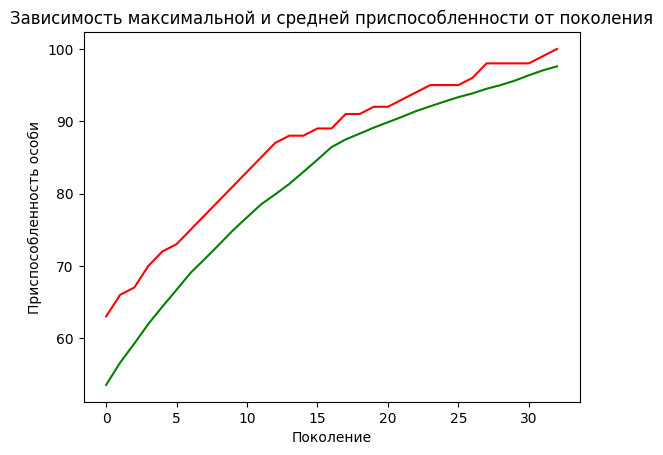

In [18]:
while max(fitnessValues) < ONE_MAX_LENGTH and generationCounter < MAX_GENERATIONS:
    generationCounter += 1
    offspring = selTournament(population, len(population)) # отбор лучших особей с помощью турнирного отбора
    offspring = list(map(clone, offspring)) # клонирование отобранных особей
    
    # скрещивание четной и нечетной особи с помощью одноточечного кроссинговера
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < P_CROSSOVER:
            cxOnePoint(child1, child2)
            
    # мутации в новом поколении
    for mutant in offspring:
        if random.random() < P_MUTATION:
            mutFlipBit(mutant, indpb=1.0/ONE_MAX_LENGTH)
            
    # обновление приспособленности новой популяции
    freshFitnessValues = list(map(oneMaxFitness, offspring))
    for individual, fitnessValue in zip(offspring, freshFitnessValues):
        individual.fitness.values = fitnessValue 
    
    # обновление списка популяции
    population[:] = offspring
    
    # обновление значений приспособленности новой популяции
    fitnessValues = [ind.fitness.values[0] for ind in population]
    
    # формируем статистику
    maxFitness = max(fitnessValues)
    meanFitness = sum(fitnessValues) / len(population)
    maxFitnessValues.append(maxFitness)
    meanFitnessValues.append(meanFitness)
    
    print(f'Поколение {generationCounter}: Макс. приспособл. = {maxFitness}, Средняя приспособл. = {meanFitness}')
    
    best_index = fitnessValues.index(max(fitnessValues))
    print('Лучший индивидум (хромосома) = ', population[best_index], '\n')
    
    
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Приспособленность особи')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()